# Projet

Groupe : Brenton, Maxime

Cours : Mathematical Foundation for Artificial Intelligence

Date : Mercredi 14 Juin

## La mise en œuvre de base du jeu

### Données

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [52]:
def tracerPlateau(A):
    n, m = A.shape
    
    plt.xlim(-0.5, n - 0.5)
    plt.ylim(m - 0.5, -0.5)
    
    plt.xticks(np.arange(-0.5, n - 0.5, 1))
    plt.yticks(np.arange(-0.5, m - 0.5, 1))
    plt.tick_params(which = 'major', labelbottom = False, labelleft = False)
    plt.gca().xaxis.tick_top()

    plt.minorticks_on()
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    plt.gca().xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
    plt.gca().yaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))

    plt.tick_params(which = 'minor', top = False, left = False, labeltop = True)
    N = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == 1])
    B = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == -1])
    if N.shape[0] > 0:
        plt.scatter(N[:, 1], N[:, 0], marker='o', s = 400, c = 'r')
    if B.shape[0] > 0:
        plt.scatter(B[:, 1], B[:, 0], marker='o', s = 400, c = 'b')

    plt.grid() 
    plt.plot()

### Global Variables Constantes

In [378]:
DIRECTIONS = np.array([[0, 1], [1, 0], [0, -1], [-1, 0],
                       [1, 1], [1, -1], [-1, 1], [-1, -1]])
                       
ALPHA = -np.inf 
BETA = np.inf

CORNER_PLACES = np.array([[0, 0], [0, 7], [7, 0], [7, 7]])

SECRET_BUTTON = True # Very secret !!!

### Fonctions nécessaires

- `init_plateau()` : initialise le plateau de jeu
- `judge_valide(A, c)` : vérifie si le coup est valide

asdf asdf asd wad[sg ewaf wea1! @! ~!@!!!!!!!!!!!!!!!!]

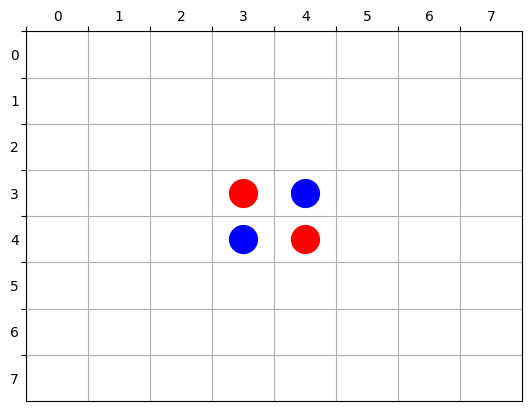

In [54]:
def init_plateau():
    A = np.zeros((8, 8), int)
    A[3, 3] = 1
    A[4, 4] = 1
    A[3, 4] = -1
    A[4, 3] = -1
    return A

A = init_plateau()
tracerPlateau(A)

In [55]:
def find_possible_steps(A, c, print_info=False):
    """
    A : np.array, le plateau
    c : int, le joueur
    """
    
    n, m = A.shape

    possible_steps = []
    possible_steps_changes = []
    
    for i in range(n):
        for j in range(m):
            change_flag = False
            if A[i, j] == 0:
                possible_steps_changes_dir = []
                for step in DIRECTIONS:
                    x, y = i, j # une copy de i, j
                    move = 0
                    changes_correspond_list = []
                    
                    x += step[0]
                    y += step[1]
                    
                    while 0 <= x and x < n and 0 <= y and y < m:
                        if A[x, y] == 0:
                            break
                        
                        if A[x, y] == c:
                            if move > 0:
                                change_flag = True
                                for k in range(1, move + 1):
                                    changes_correspond_list.append([x - k * step[0], y - k * step[1]])
                            break

                        if A[x, y] == -c:
                            x += step[0]
                            y += step[1]
                            move += 1
                            
                        
                    if changes_correspond_list:
                        possible_steps_changes_dir.append(changes_correspond_list)
                
                if possible_steps_changes_dir:    
                    possible_steps_changes.extend(possible_steps_changes_dir)
                
            if change_flag:
                possible_steps.append([i, j])
    
    if print_info:
        print("---------Possible Steps---------")
        for step, change in zip(possible_steps, possible_steps_changes):
            print(f"Step: {step}, Changes: {change}")
        print("---------Possible Steps---------")
          
    return possible_steps, possible_steps_changes

_ = find_possible_steps(A, c=1)

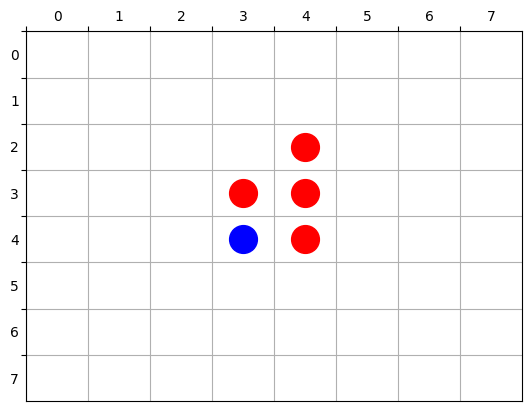

In [56]:
def update(A, c, step=None, changes=None):
    A = A.copy()
    if step:    
        if not changes:
            "If changes are not given, we are going to find the corresponding changes"
            possible_steps, possible_steps_changes = find_possible_steps(A, c)
        
            if possible_steps:     
                "If there are possible steps, we are going to check if the step is valid"
                assert step in possible_steps, "Invalid Step"
                for candidate_step, candidate_change in zip(possible_steps, possible_steps_changes):
                    if candidate_step == step:
                        for change in candidate_change:
                            A[change[0], change[1]] = c
                        A[step[0], step[1]] = c
                        break
            
            "If there are no possible steps, we are going to skip the step"
                

        else:
            "If changes are given, we are going to skip the step check"
            A[step[0], step[1]] = c
            for change in changes:
                A[change[0], change[1]] = c
    
    return A

A = init_plateau()                
A = update(A, c=1, step=[2, 4])
tracerPlateau(A)

In [190]:
def game_finish(A):
    game_status = False
    if np.sum(A == 0) == 0:
        game_status = True
    
    if not find_possible_steps(A, c=1)[0] and not find_possible_steps(A, c=-1)[0]:
        game_status = True

    return game_status

A = init_plateau()
game_finish(A)

False

In [195]:
def print_info(A):
    print("Le résultat : {} --- {} ".format(np.sum(A == 1), np.sum(A == -1)))
    tracerPlateau(A)

### Class (废案)

In [58]:
class Jeu_de_Othello():
    def __init__(self, print_info=False):
        self.plateau = np.zeros((8,8))
        self.plateau[3,3] = 1
        self.plateau[4,4] = 1
        self.plateau[3,4] = -1
        self.plateau[4,3] = -1
        self.joueur = 1
        self.pions = 4
        self.pions_list = []
        self.pions1 = 2
        self.pions2 = 2
        self.coups = 0
        self.skip = 0
        self.print_info = print_info
        
    def fig(self):
        tracerPlateau(self.plateau)
        
    def find_possible_steps(self, c=None):
        A = self.plateau
        if c:
            self.joueur = c

        c = self.joueur
        
        n, m = A.shape

        possible_steps = []
        possible_steps_changes = []
        
        for i in range(n):
            for j in range(m):
                change_flag = False
                if A[i, j] == 0:
                    possible_steps_changes_dir = []
                    for step in DIRECTIONS:
                        x, y = i, j # une copy de i, j
                        move = 0
                        changes_correspond_list = []
                        
                        x += step[0]
                        y += step[1]
                        
                        while 0 <= x and x < n and 0 <= y and y < m:
                            if A[x, y] == 0:
                                break
                            
                            if A[x, y] == c:
                                if move > 0:
                                    change_flag = True
                                    for k in range(1, move + 1):
                                        changes_correspond_list.append([x - k * step[0], y - k * step[1]])
                                break

                            if A[x, y] == -c:
                                x += step[0]
                                y += step[1]
                                move += 1
                                
                            
                        if changes_correspond_list:
                            possible_steps_changes_dir.append(changes_correspond_list)
                    
                    if possible_steps_changes_dir:    
                        possible_steps_changes.extend(possible_steps_changes_dir)
                    
                if change_flag:
                    possible_steps.append([i, j])
                    
        if self.print_info:
            print("---------Possible Steps---------")
            for step, change in zip(possible_steps, possible_steps_changes):
                print(f"Step: {step}, Changes: {change}")
            print("---------Possible Steps---------")

        return possible_steps, possible_steps_changes
    
    def update(self, step=None, changes=None, c=None):
        A = self.plateau
        if c:
            self.joueur = c
        
        if step:    
            if not changes:
                "If changes are not given, we are going to find the corresponding changes"
                possible_steps, possible_steps_changes = self.find_possible_steps() # 重复了两次，可以优化
            
                if possible_steps:     
                    "If there are possible steps, we are going to check if the step is valid"
                    assert step in possible_steps, "Invalid Step"
                    for candidate_step, candidate_change in zip(possible_steps, possible_steps_changes):
                        if candidate_step == step:
                            for change in candidate_change:
                                A[change[0], change[1]] = self.joueur
                            A[step[0], step[1]] = self.joueur
                            break
                
                "If there are no possible steps, we are going to skip the step"
                    

            else:
                "If changes are given, we are going to skip the step check"
                A[step[0], step[1]] = self.joueur
                for change in changes:
                    A[change[0], change[1]] = self.joueur
        
        "Update the game status"
        self.joueur = - self.joueur
        self.pions += 1
        self.coups += 1
        self.pions_list.append(step)
        
        self.pions1 = np.sum(A == 1)
        self.pions2 = np.sum(A == -1)
        
        if self.print_info:
            self.fig()
        
    def game_finish(self):
        """
        Two possibilities for the game to finish:
        1. No possible steps for both players
        2. The board is full
        """
        
        if self.pions == 64 or self.skip == 2:
            print("-----------------Game Finish-----------------")
            print("Game status: {} - {}".format(self.pions1, self.pions2))
            print("-----------------Game Finish-----------------")
            
            return True

## Algorithms

### 0. Selectionner les coups possibles (Random)

Le résultat : 32 --- 32 


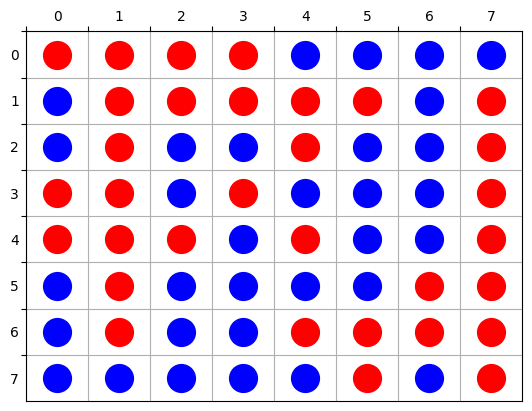

In [316]:
def game_auto(A, c):
    while not game_finish(A):
        possible_steps, possible_steps_changes = find_possible_steps(A, c)

        if possible_steps:
            step = random.choice(possible_steps)
            A = update(A, c, step, possible_steps_changes[possible_steps.index(step)])
            # tracerPlateau(A)
            plt.show()
            c = -c
        else:
            c = -c
    return A
         
A = init_plateau()
print_info(game_auto(A, c=1))

In [321]:
%timeit A = init_plateau(); game_auto(A, c=1)

36.6 ms ± 530 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 1. Minmax

#### a. Minmax (Basique)

In [105]:
def score(A):
    return np.sum(A == 1) - np.sum(A == -1)

score(A)

0

In [145]:
def minmax(A, c, depth):
    if depth == 0 or game_finish(A):
        return None, score(A)
    
    possible_steps, possible_steps_changes = find_possible_steps(A, c)
    
    if not possible_steps:
        return None, score(A)
    
    score_global = -c * np.inf
    
    for steps, changes in zip(possible_steps, possible_steps_changes):
        A_copy = update(A, c, steps, changes)
        step_next_depth, score_next_depth = minmax(A_copy, -c, depth - 1)
        
        if c==1 and score_next_depth > score_global:
            score_global = score_next_depth
            step = steps
            
        if c==-1 and score_next_depth < score_global:
            score_global = score_next_depth
            step = steps
    
    return step, score_global

A = init_plateau()
minmax(A, 1, 7)

([2, 4], 3)

In [148]:
def alpha_beta(A, c, depth):
    global alpha, beta
    if depth == 0 or game_finish(A):
        return None, score(A)
    
    possible_steps, possible_steps_changes = find_possible_steps(A, c)
    if not possible_steps:
        return None, score(A)
    
    score_global = -c * np.inf
    alpha = ALPHA; beta = BETA
    
    for steps, changes in zip(possible_steps, possible_steps_changes):
        A_copy = update(A, c, steps, changes)
        step_next_depth, score_next_depth = alpha_beta(A_copy, -c, depth - 1)
        
        if c==1:
            if score_next_depth > score_global:
                score_global = score_next_depth                 
                step = steps

            if score_global > alpha:
                alpha = score_global
                if alpha >= beta:
                    break
               
        if c==-1:
            if score_next_depth < score_global:
                score_global = score_next_depth
                step = steps
            
            if score_global < beta:
                beta = score_global
                if beta <= alpha:
                    break
            
    return step, score_global

A = init_plateau()
alpha_beta(A, 1, 8)

([2, 4], -2)

Le résultat : 40 --- 24 


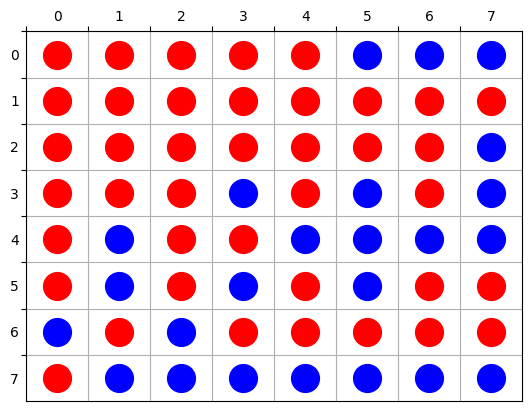

In [313]:
A = init_plateau()
c = 1

while not game_finish(A):
    possible_steps, possible_steps_changes = find_possible_steps(A, c)
    
    if c == 1:
        if possible_steps:
            step = alpha_beta(A, c, depth=5)[0]
            A = update(A, c, step, possible_steps_changes[possible_steps.index(step)])
            plt.show()
    if c == -1:
        if possible_steps:
            step = random.choice(possible_steps)
            A = update(A, c, step, possible_steps_changes[possible_steps.index(step)])
            plt.show()
    c = -c

print_info(A)

### 2. LDA - Improvements on the "score" function

In [385]:
if SECRET_BUTTON:
    game_list = []; result_list = []
    for fois in range(40000):
        A = init_plateau()
        A = game_auto(A, c=1)
        game_list.append(A.flatten())
        if score(A) > 0:
            result_list.append(1)
        elif score(A) < 0:
            result_list.append(-1)
        else:
            result_list.append(0)
        if fois % 1000 == 0:
            print(f"Nous avons fait {fois}/{40000} fois")
            
    game_list = np.array(game_list) 
    result_list = np.array(result_list)
    game_list.tofile("game_list.csv")
    result_list.tofile("result_list.csv")

Nous avons fait 0/40000 fois
Nous avons fait 1000/40000 fois
Nous avons fait 2000/40000 fois
Nous avons fait 3000/40000 fois
Nous avons fait 4000/40000 fois
Nous avons fait 5000/40000 fois
Nous avons fait 6000/40000 fois
Nous avons fait 7000/40000 fois
Nous avons fait 8000/40000 fois
Nous avons fait 9000/40000 fois
Nous avons fait 10000/40000 fois
Nous avons fait 11000/40000 fois
Nous avons fait 12000/40000 fois
Nous avons fait 13000/40000 fois
Nous avons fait 14000/40000 fois
Nous avons fait 15000/40000 fois
Nous avons fait 16000/40000 fois
Nous avons fait 17000/40000 fois
Nous avons fait 18000/40000 fois
Nous avons fait 19000/40000 fois
Nous avons fait 20000/40000 fois
Nous avons fait 21000/40000 fois
Nous avons fait 22000/40000 fois
Nous avons fait 23000/40000 fois
Nous avons fait 24000/40000 fois
Nous avons fait 25000/40000 fois
Nous avons fait 26000/40000 fois
Nous avons fait 27000/40000 fois
Nous avons fait 28000/40000 fois
Nous avons fait 29000/40000 fois
Nous avons fait 30000/4

In [228]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
def calculate_info(A):
    info_list = []
    

In [375]:
plateau_count = np.zeros_like(A)

for fois in range(TOTAL_FOIS):
    A = init_plateau()
    A = game_auto(A, c=1)
    A = np.array(A)
    
    if score(A) > 0:
        plateau_count[A == 1] += 1
    if score(A) < 0:
        plateau_count[A == -1] += 1


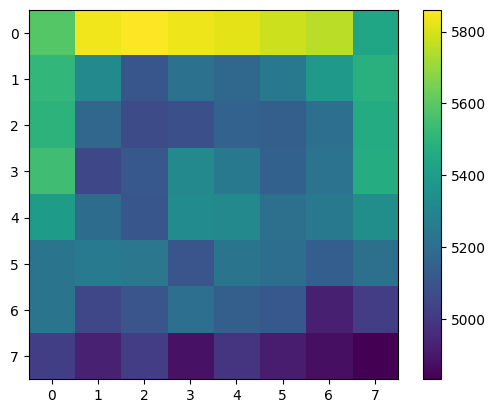

In [376]:
plt.imshow(plateau_count)
plt.colorbar()

In [377]:
plateau_count

array([[5590, 5837, 5861, 5836, 5817, 5784, 5754, 5442],
       [5514, 5317, 5106, 5220, 5176, 5250, 5389, 5485],
       [5499, 5170, 5068, 5082, 5154, 5145, 5206, 5467],
       [5544, 5057, 5116, 5318, 5250, 5151, 5223, 5469],
       [5402, 5197, 5109, 5327, 5316, 5213, 5247, 5342],
       [5229, 5261, 5238, 5104, 5227, 5202, 5139, 5210],
       [5228, 5053, 5105, 5209, 5144, 5115, 4922, 5019],
       [5023, 4925, 5019, 4884, 4989, 4913, 4875, 4832]])

In [370]:
plateau_count.sum()/64

520.375

In [325]:
game_list = []; result_list = []
for fois in range(TOTAL_FOIS):
    A = init_plateau()
    A = game_auto(A, c=1)
    game_list.append(A.flatten())
    if score(A) > 0:
        result_list.append(1)
    elif score(A) < 0:
        result_list.append(-1)
    else:
        result_list.append(0)
    if fois % 400 == 0:
        print(f"Nous avons fait {fois}/{TOTAL_FOIS} fois")

Nous avons fait 0/2000 fois
Nous avons fait 400/2000 fois
Nous avons fait 800/2000 fois
Nous avons fait 1200/2000 fois
Nous avons fait 1600/2000 fois


In [327]:
game_list = np.array(game_list)
result_list = np.array(result_list)

game_list.shape, result_list.shape

((2000, 64), (2000,))

### Monte Carlo Tree Search

https://www.zhihu.com/question/39916945
SELECTION

The idea is to keep selecting best child nodes until we reach the leaf node of the tree. A good way to select such a child node is to use UCT (Upper Confidence Bound applied to trees) formula:

	wi/ni + c*sqrt(t)/ni
wi = number of wins after the i-th move
ni = number of simulations after the i-th move
c = exploration parameter (theoretically equal to √2)
t = total number of simulations for the parent node

EXPANSION:

When it can no longer apply UCT to find the successor node, it expands the game tree by appending all possible states from the leaf node.

SIMULATION:

After Expansion, the algorithm picks a child node arbitrarily, and it simulates entire game from selected node until it reaches the resulting state of the game. If nodes are picked randomly during the play out, it is called light play out. You can also opt for heavy play out by writing quality heuristics or evaluation functions.

BACKPROPAGATION:

Once the algorithm reaches the end of the game, it evaluates the state to figure out which player has won. It traverses upwards to the root and increments visit score for all visited nodes. It also updates win score for each node if the player for that position has won the playout.

In [ ]:
TIME_LIMIT = 9.5
UCT_C = 1.414
UCT_FUNC = lambda w_i, n_i, n: w_i / n_i + UCT_C * np.sqrt(np.log(n) / n_i)

In [ ]:
def uct_algorithm(A, c):

SyntaxError: incomplete input (278754776.py, line 1)